Credits (Udemy Course) - https://www.udemy.com/course/deeplearning/

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
 df = pd.read_csv(r"E:\Github\Datasets\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df['Gender'].value_counts().index[0]

'Male'

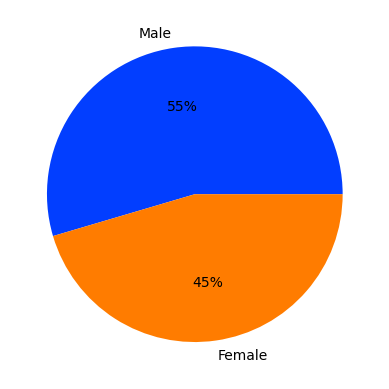

In [15]:
colors = sns.color_palette('bright')[0:3]

#create pie chart
plt.pie(x = df['Gender'].value_counts().values, 
        labels = df['Gender'].value_counts().index, 
        colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Geography', ylabel='count'>

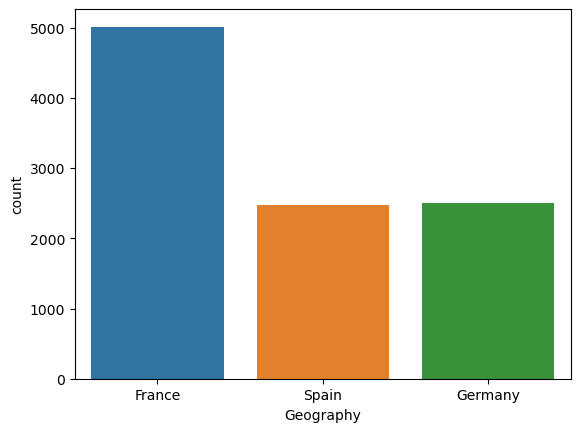

In [5]:
sns.countplot(data = df, x = 'Geography')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

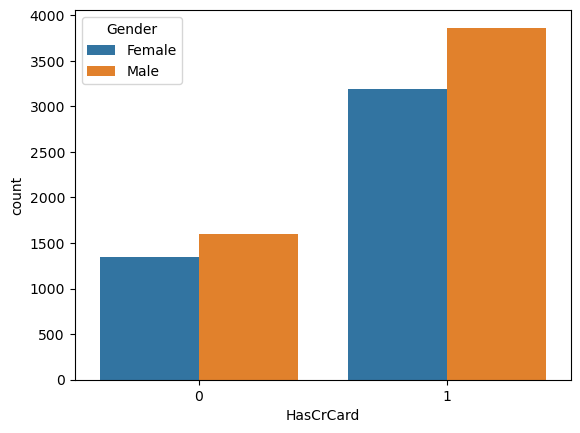

In [10]:
sns.countplot(data = df, x = 'HasCrCard', hue = 'Gender')

In [16]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [17]:
X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]

In [18]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Encoding categorical variables

In [21]:
le = LabelEncoder()

In [22]:
X['Gender'] = le.fit_transform(X['Gender'])

In [23]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [31]:
X = pd.get_dummies(data = X, 
               prefix='Geography',
               prefix_sep='_',
               dummy_na = False,
               columns=['Geography']).iloc[:, :-1]

In [32]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0


In [35]:
X_cols = list(X.columns)
X_cols

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany']

Splitting of the dataset

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train.shape, y_train.shape

((8000, 11), (8000,))

In [42]:
X_test.shape, y_test.shape

((2000, 11), (2000,))

Feature Scaling

In [44]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit(X_test)

Building the ANN Model